<a href="https://colab.research.google.com/github/ThuyHaLE/Problem3_Natural-Language-Processing/blob/main/NLP_word_embedding(ELMO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tokenization is the first step in natural language processing (NLP) projects. It involves dividing a text into individual units, known as tokens. Tokens can be words or punctuation marks. These tokens are then transformed into numerical vectors representing words. Two main concepts are vectorization and embedding. Text Vectorization is the process of turning words into numerical vectors in a one-dimensional space. Word Embedding (Word Vector) is a type of vectorization through deep learning as dense vectors in a high-dimensional space.
- Text Vectorization
  - Traditional approach
    - One-Hot Encoding
    - Bag of Words
    - CountVectorizer
    - TF-IDF
      
- Word Embedding
  - Context-independent
    - Neural Word Embedding
      - Word2Vec
    - Pretrained Word-Embedding
      - GloVe
      - FastText
  - Context-dependent
    - RNN based
      - ELMO
      - CoVe
    - Transformer based
      - BERT
      - XML
      - RoBERTa
      - ALBERT

- Document embedding
  - Doc2Vec
    - Distributed Memory (DM)
    - Distributed Bag of Words (DBOW)

#Word Embedding

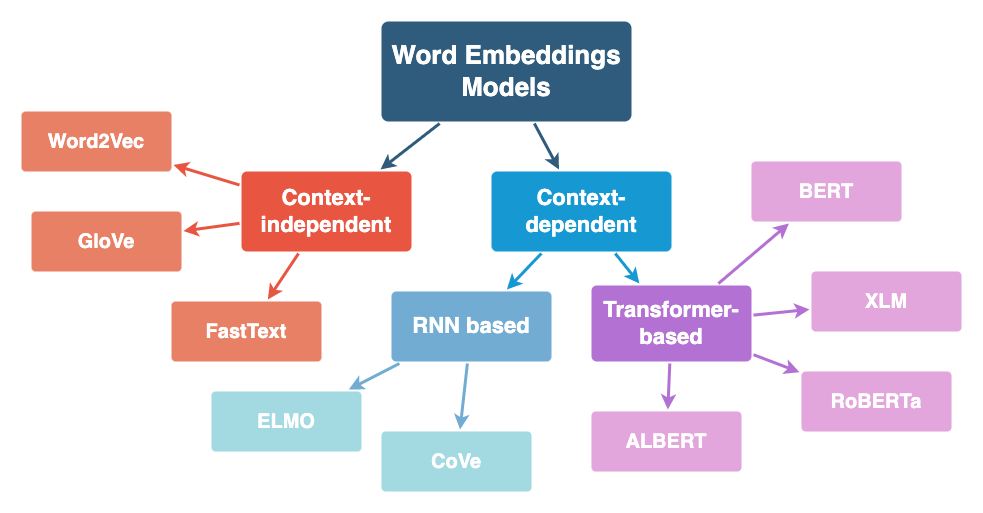

##Context-dependent

###RNN based

####ELMO

Unlike traditional word embeddings like Word2Vec or GloVe, which generate a single, static representation for each word, ELMO (Embeddings from Language Models) provides dynamic embeddings that capture the contextual meaning of words in sentences. <Br>
- **Contextualized Embeddings**:
Static representation assigns a single vector to each word, regardless of context. For example, the representation of "bank" is the same whether it's used in "river bank" or "bank account".
With dynamic embedding, deep bidirectional language models represent a "bank" as different vectors regarding its appearing context in a sentence.
- **Deep, Bidirectional Language Models**:
It considers the left and right context when generating word embedding. The model is trained on a large text corpus, where it learns to predict the next word in a sentence, considering both the preceding and following words.
- **Layered Representations**:
Word embedding uses a combination of representations from different neural network layers. A three-layered architecture: a character-level convolutional neural network (CNN), and two bidirectional LSTM layers. Each layer captures different levels of abstraction: the lower layers capture more syntactic information, while the higher layers capture more semantic information.

**Model Architecture** <Br>
ELMo uses a combination of character-level CNNs, word-level embeddings, and bidirectional <Br>
- **Character-Level CNN** <Br>
  **Input**: Sequence of characters for each word. <Br>
  **Embedding Layer**: Map characters to dense vectors.<Br>
  **Convolutional Layers**: Apply multiple convolutional filters of varying widths to capture character-level features.<Br>
  **Max-Pooling**: Apply max-pooling over the character-level features.<Br>
  **Highway Network**: Use highway networks to allow the model to carry some character-level features directly to the output.<Br>
- **Bi-Directional LSTM**
<Br>
  **Input**: Concatenate character-level embeddings with pre-trained word embeddings (if available).<Br>
  **Layers**: Stack multiple layers of bidirectional LSTMs.<Br>
  **Output**: The hidden states from the LSTM layers are used to generate context-sensitive word embeddings.<Br>

Character-Level CNN

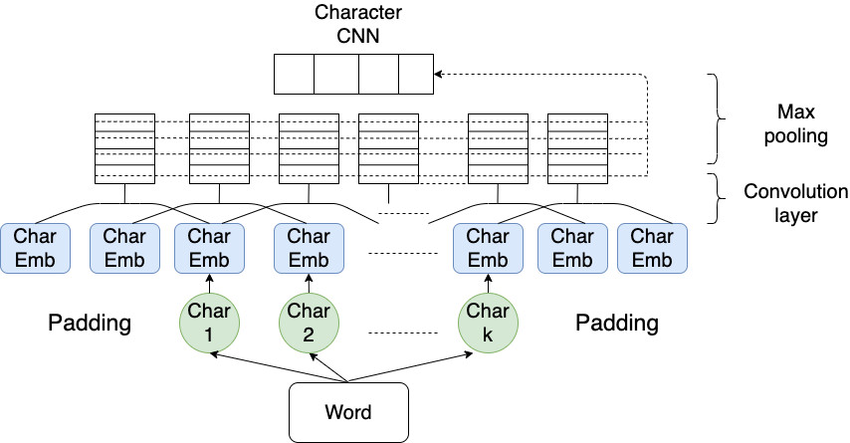

Data Collection and Preprocessing

Build Character Vocabulary: Create a mapping of characters to unique indices.<Br>
Convert Text to Character Indices:Transform each character in your text data into its corresponding index.<Br>
Pad Sequences:Ensure that all sequences are of the same length for batch processing.

In [1]:
!pip -q install gutenbergpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 41.0 MB/s eta 0:00:00


In [2]:
import os
import re

import nltk
# Download necessary NLTK resources
nltk.download('punkt')

from collections import Counter

import gutenbergpy.textget

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Function to clean the text by removing headers and footers
def strip_headers(text):
    header_pattern = r"\*\*\* START OF (THIS|THE) PROJECT GUTENBERG EBOOK [^\*]+\*\*\*"
    footer_pattern = r"\*\*\* END OF (THIS|THE) PROJECT GUTENBERG EBOOK [^\*]+\*\*\*"
    header_match = re.search(header_pattern, text)
    footer_match = re.search(footer_pattern, text)
    if header_match and footer_match:
        start_idx = header_match.end()
        end_idx = footer_match.start()
        text = text[start_idx:end_idx]
    return text.strip()

# Function to download and clean a book by its Gutenberg ID
def download_gutenberg_book(book_id):
    text = gutenbergpy.textget.get_text_by_id(book_id)
    text = text.decode('utf-8')
    cleaned_text = strip_headers(text)
    return cleaned_text

# List of book IDs to download
book_ids = [1342, 84, 11]  # Example IDs: "Pride and Prejudice", "Frankenstein", "Alice's Adventures in Wonderland"
# Directory to save the books
output_dir = "gutenberg_books"
os.makedirs(output_dir, exist_ok=True)
for book_id in book_ids:
    book_text = download_gutenberg_book(book_id)
    with open(os.path.join(output_dir, f"book_{book_id}.txt"), "w", encoding="utf-8") as f:
        f.write(book_text)
print(f"Downloaded and saved {len(book_ids)} books to '{output_dir}'")

Downloaded and saved 3 books to 'gutenberg_books'


In [4]:
# Function to read the text from a file
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\W+', ' ', text.lower()).strip()
    return text

# Read the text from the file
file_path = '/content/gutenberg_books/book_11.txt'
book_text = read_text_file(file_path)
text_data = book_text[:10000]
texts = [clean_text(text) for text in nltk.sent_tokenize(text_data)]
word_corpus = [x.split() for x in texts]
print(f'number of sentences in corpus: {len(texts)}')
print(f'number of words in each sentence: {[len(word) for word in word_corpus]} \nwith max_value is {max([len(word) for word in word_corpus])}')
print(f'number of characters in each word: {[[len(word) for word in words] for words in word_corpus]} \nwith max_value is {max([max([len(word) for word in words]) for words in word_corpus])}')

number of sentences in corpus: 67
number of words in each sentence: [18, 6, 6, 9, 15, 5, 6, 7, 7, 5, 4, 2, 5, 117, 29, 2, 113, 21, 40, 34, 53, 55, 19, 9, 23, 3, 8, 14, 11, 99, 4, 10, 17, 41, 26, 7, 12, 18, 12, 15, 12, 3, 8, 25, 31, 30, 43, 1, 16, 43, 78, 45, 44, 23, 44, 35, 55, 11, 38, 82, 23, 111, 46, 51, 43, 38, 10] 
with max_value is 117
number of characters in each word: [[12, 5, 1, 10, 2, 10, 2, 5, 7, 3, 10, 7, 7, 1, 1, 8, 7, 1], [4, 3, 6, 4, 7, 2], [3, 4, 2, 5, 7, 3], [1, 6, 4, 3, 1, 4, 4, 7, 2], [3, 6, 5, 2, 1, 6, 4, 7, 1, 6, 4, 1, 11, 7, 2], [3, 3, 6, 7, 3], [1, 3, 3, 5, 7, 4], [3, 5, 1, 7, 6, 7, 2], [3, 4, 6, 1, 5, 7, 1], [3, 7, 9, 7, 2], [3, 5, 3, 5], [7, 3], [5, 1, 8, 7, 1], [4, 3, 6, 4, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6, 2, 3, 4, 3, 2, 6, 7, 2, 2, 4, 2, 5, 3, 3, 6, 4, 3, 4, 3, 6, 3, 7, 3, 2, 3, 2, 8, 2, 13, 2, 2, 3, 4, 2, 3, 3, 2, 1, 4, 7, 5, 7, 8, 2, 13, 2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3, 3, 3, 4, 3, 4, 4, 6, 3, 6, 7, 3, 8, 2, 6, 1, 5, 5, 5, 2, 5, 3, 7, 2, 7, 2

In [5]:
import torch
import itertools
from collections import Counter
from torch.utils.data import Dataset

In [6]:
#Build the Vocabulary
def build_vocab(corpus):
    word_counter = Counter()
    char_counter = Counter()
    for sentence in corpus:
        words = sentence.split()
        word_counter.update(words)
        char_counter.update(itertools.chain.from_iterable(words))
    word_vocab = {word: idx for idx, (word, _) in enumerate(word_counter.items(), start=1)}
    char_vocab = {char: idx for idx, (char, _) in enumerate(char_counter.items(), start=1)}
    word_vocab['<pad>'] = 0
    char_vocab['<pad>'] = 0
    return word_vocab, char_vocab

word_vocab, char_vocab = build_vocab(texts)
print('word_vocab: ', word_vocab)
print('char_vocab: ', char_vocab)

word_vocab:  {'illustration': 1, 'alice': 2, 's': 3, 'adventures': 4, 'in': 5, 'wonderland': 6, 'by': 7, 'lewis': 8, 'carroll': 9, 'the': 10, 'millennium': 11, 'fulcrum': 12, 'edition': 13, '3': 14, '0': 15, 'contents': 16, 'chapter': 17, 'i': 18, 'down': 19, 'rabbit': 20, 'hole': 21, 'ii': 22, 'pool': 23, 'of': 24, 'tears': 25, 'iii': 26, 'a': 27, 'caucus': 28, 'race': 29, 'and': 30, 'long': 31, 'tale': 32, 'iv': 33, 'sends': 34, 'little': 35, 'bill': 36, 'v': 37, 'advice': 38, 'from': 39, 'caterpillar': 40, 'vi': 41, 'pig': 42, 'pepper': 43, 'vii': 44, 'mad': 45, 'tea': 46, 'party': 47, 'viii': 48, 'queen': 49, 'croquet': 50, 'ground': 51, 'ix': 52, 'mock': 53, 'turtle': 54, 'story': 55, 'x': 56, 'lobster': 57, 'quadrille': 58, 'xi': 59, 'who': 60, 'stole': 61, 'tarts': 62, 'xii': 63, 'evidence': 64, 'was': 65, 'beginning': 66, 'to': 67, 'get': 68, 'very': 69, 'tired': 70, 'sitting': 71, 'her': 72, 'sister': 73, 'on': 74, 'bank': 75, 'having': 76, 'nothing': 77, 'do': 78, 'once': 79,

In [7]:
#Convert Text to Indices w padding
def text_to_indices(text, word_vocab, char_vocab, max_word_length):
    word_indices = []
    char_indices = []
    for sentence in text:
        words = sentence.split()
        word_idx = [word_vocab.get(word, 0) for word in words]
        char_idx = [[char_vocab.get(char, 0) for char in word[:max_word_length]] for word in words]
        # Pad character sequences
        for idx in char_idx:
            while len(idx) < max_word_length:
                idx.append(char_vocab['<pad>'])
        word_indices.append(word_idx)
        char_indices.append(char_idx)
    return word_indices, char_indices

#Convert Text to Indices
max_word_length = max([max([len(word) for word in sent.split()]) for sent in texts])  # Maximum character length per word
print('max_word_length (the longest word length in corpus): ', max_word_length)
word_indices, char_indices = text_to_indices(texts, word_vocab, char_vocab, max_word_length)
print('==>')

print('word_indices: ', word_indices)
print(f'number of sentence in corpus: , {len(word_indices)}\
\nnumber of word in each sentence: {[len(sent) for sent in word_indices]}')
print('==>')

print('char_indices: ', char_indices)
print(f'number of sentence in corpus: {len(char_indices)} \
\nnumber of character in each word (padding => max_word_length): {[[len(char) for char in sent] for sent in char_indices]}')

max_word_length (the longest word length in corpus):  14
==>
word_indices:  [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [19, 10, 20, 21, 17, 22], [10, 23, 24, 25, 17, 26], [27, 28, 29, 30, 27, 31, 32, 17, 33], [10, 20, 34, 5, 27, 35, 36, 17, 37, 38, 39, 27, 40, 17, 41], [42, 30, 43, 17, 44], [27, 45, 46, 47, 17, 48], [10, 49, 3, 50, 51, 17, 52], [10, 53, 54, 3, 55, 17, 56], [10, 57, 58, 17, 59], [60, 61, 10, 62], [17, 63], [2, 3, 64, 17, 18], [19, 10, 20, 21, 2, 65, 66, 67, 68, 69, 70, 24, 71, 7, 72, 73, 74, 10, 75, 30, 24, 76, 77, 67, 78, 79, 80, 81, 82, 83, 84, 85, 10, 86, 72, 73, 65, 87, 88, 89, 83, 90, 91, 80, 92, 5, 89, 30, 93, 94, 10, 95, 24, 27, 86, 96, 2, 97, 91, 80, 92, 98, 82, 65, 99, 5, 72, 100, 101, 102, 103, 102, 82, 104, 105, 10, 106, 107, 108, 72, 109, 69, 110, 30, 111, 112, 10, 113, 24, 114, 27, 115, 116, 117, 118, 119, 10, 120, 24, 121, 122, 30, 123, 10, 124, 125, 126, 27, 127, 20, 128, 129, 130, 131, 132, 7, 72], [133, 65, 77, 98, 134, 135, 5, 13

In [8]:
#Define Targets
#Preparing the target sequences for both forward and backward LSTMs
def create_targets(word_indices, seq_length):
    targets = []
    for sentence in word_indices:
        if len(sentence) < seq_length:
            sentence += [0] * (seq_length - len(sentence))
        else:
            sentence = sentence[:seq_length]
        forward_target = sentence[1:] + [0]  # Shift left
        backward_target = [0] + sentence[:-1]  # Shift right
        targets.append((forward_target, backward_target))
    return targets

#Define Targets
max_seq_length = max(len(text.split()) for text in texts)
print('max_seq_length (the longest sentence length in corpus): ', max_seq_length)
targets = create_targets(word_indices, max_seq_length)
print('targets: ', torch.tensor(targets).shape)
print(f'number of sentence in targets: {torch.tensor(targets).shape[0]}, \
number of word in each sentence (padding => max_seq_length): {torch.tensor(targets).shape[2]}')

max_seq_length (the longest sentence length in corpus):  117
targets:  torch.Size([67, 2, 117])
number of sentence in targets: 67, number of word in each sentence (padding => max_seq_length): 117


Convolution 1D

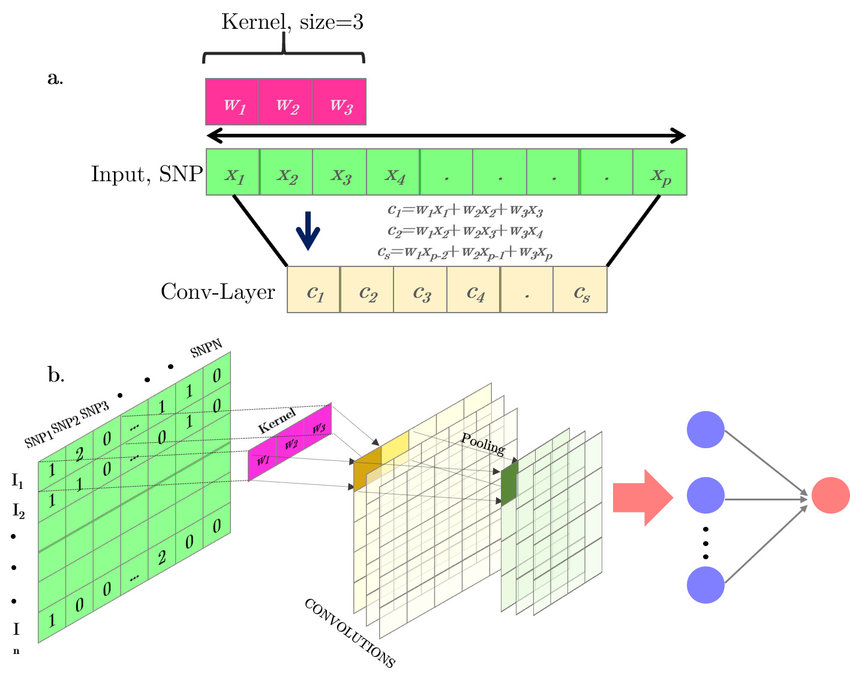

In [9]:
class TextDatasetWithTargets(Dataset):
    def __init__(self, word_indices, char_indices, targets, seq_length):
        self.word_indices = word_indices
        self.char_indices = char_indices
        self.targets = targets
        self.seq_length = seq_length
    def __len__(self):
        return len(self.word_indices)
    def __getitem__(self, idx):
        words = self.word_indices[idx]
        chars = self.char_indices[idx]
        forward_target, backward_target = self.targets[idx]
        # Ensure consistent sequence length
        if len(chars) < self.seq_length:
            words += [0] * (self.seq_length - len(words))
            chars += [[0] * len(chars[0])] * (self.seq_length - len(chars))
        else:
            words = words[:self.seq_length]
            chars = chars[:self.seq_length]
        return torch.tensor(words), torch.tensor(chars), torch.tensor(forward_target), torch.tensor(backward_target)

#Create the Dataset Class
max_seq_length = max(len(text.split()) for text in texts)
dataset = TextDatasetWithTargets(word_indices, char_indices, targets, max_seq_length)

#Create DataLoader
from torch.utils.data import DataLoader
batch_size = 1
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

word_dataset, char_dataset, forward_target, backward_target = next(iter(train_loader))
print('for one sentence in corpus: ')
print('word_dataset (number of word in each sentence (padding => max_seq_length): ', word_dataset.size())
print('char_dataset (number of word in each sentence (padding => max_seq_length) x number of character in each word (padding => max_word_length)): ', char_dataset.size())
print('forward_target (number of word in each sentence (padding => max_seq_length): ', forward_target.size())
print('backward_target (number of word in each sentence (padding => max_seq_length): ', backward_target.size())

for one sentence in corpus: 
word_dataset (number of word in each sentence (padding => max_seq_length):  torch.Size([1, 117])
char_dataset (number of word in each sentence (padding => max_seq_length) x number of character in each word (padding => max_word_length)):  torch.Size([1, 117, 14])
forward_target (number of word in each sentence (padding => max_seq_length):  torch.Size([1, 117])
backward_target (number of word in each sentence (padding => max_seq_length):  torch.Size([1, 117])


In [10]:
import torch
import torch.nn as nn
#CharCNN and HighwayNetwork

char_vocab_size = len(char_vocab)  #character vocabulary size
char_embed_dim = 50 #character embedding dimension
out_channels = 100 #number of kernel
kernel_sizes = [1, 2, 3] #kernel sizes

print(f'Character Vocabulary Size: {char_vocab_size}')
print(f'Character Embedding Dimension: {char_embed_dim}')
print(f'Output Channels: {out_channels}')
print(f'Kernel Sizes: {kernel_sizes}')

Character Vocabulary Size: 30
Character Embedding Dimension: 50
Output Channels: 100
Kernel Sizes: [1, 2, 3]


In [11]:
#CharCNN
batch_size, max_seq_len, max_word_len = char_dataset.size()
print('char_dataset size: ', batch_size, max_seq_len, max_word_len)
char_embed = nn.Embedding(char_vocab_size, char_embed_dim)
print('char_embed: ', char_embed)
embedded = char_embed(char_dataset).unsqueeze(1)
print(f'char_dataset: {char_dataset.shape} => embed: {embedded.shape}') #batch_size = 1
embedded = embedded.view(batch_size * max_seq_len, 1, max_word_len, char_embed_dim)  # (batch_size * seq_len, 1, word_len, char_embedding_dim)
print(f'reshaped_embed: {embedded.shape}')

convs = nn.ModuleList([nn.Conv2d(1, out_channels, (k, char_embed_dim)) for k in kernel_sizes])
print('convs: ', convs)
conv_outputs = [torch.relu(conv(embedded)).squeeze(3) for conv in convs]  # (batch_size * seq_len, num_filters, word_len - fs + 1)
print('output after convolution step for each filter_size: ')
for i in range(len(kernel_sizes)):
  print(f'filter_size {kernel_sizes[i]}: conv_outputs_size: {conv_outputs[i].shape}')
  print(f"number of words in input (filter_size={kernel_sizes[i]}): {conv_outputs[i].shape[0]}, \
  presentation for each word: {conv_outputs[i].shape[2]}x{conv_outputs[i].shape[1]}")
print('===>')

pooled_outputs = [torch.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in conv_outputs]  # (batch_size * seq_len, num_filters)
print('output after max pooling step for each filter_size: ')
for i in range(len(kernel_sizes)):
  print(f'filter_size {kernel_sizes[i]}: conv_outputs_size: {pooled_outputs[i].shape}')
  print(f"number of words in input (filter_size={kernel_sizes[i]}): {pooled_outputs[i].shape[0]}, \
  presentation for each word: 1x{pooled_outputs[i].shape[1]}")
print('===>')

char_embeddings = torch.cat(pooled_outputs, dim=1)  # (batch_size * seq_len, num_filters * len(filter_sizes))
print('output after concate outputs from 3 filter size: ', char_embeddings.shape)
print(f"number of words in input: {char_embeddings.shape[0]}, \
presentation for each word: 1x{char_embeddings.shape[1]}")

char_dataset size:  1 117 14
char_embed:  Embedding(30, 50)
char_dataset: torch.Size([1, 117, 14]) => embed: torch.Size([1, 1, 117, 14, 50])
reshaped_embed: torch.Size([117, 1, 14, 50])
convs:  ModuleList(
  (0): Conv2d(1, 100, kernel_size=(1, 50), stride=(1, 1))
  (1): Conv2d(1, 100, kernel_size=(2, 50), stride=(1, 1))
  (2): Conv2d(1, 100, kernel_size=(3, 50), stride=(1, 1))
)
output after convolution step for each filter_size: 
filter_size 1: conv_outputs_size: torch.Size([117, 100, 14])
number of words in input (filter_size=1): 117,   presentation for each word: 14x100
filter_size 2: conv_outputs_size: torch.Size([117, 100, 13])
number of words in input (filter_size=2): 117,   presentation for each word: 13x100
filter_size 3: conv_outputs_size: torch.Size([117, 100, 12])
number of words in input (filter_size=3): 117,   presentation for each word: 12x100
===>
output after max pooling step for each filter_size: 
filter_size 1: conv_outputs_size: torch.Size([117, 100])
number of words

In [12]:
#HighwayNetwork
num_layers = 2
size = out_channels * len(kernel_sizes)
linear = nn.ModuleList([nn.Linear(size, size) for _ in range(num_layers)])
print('linear: ', linear)
gate = nn.ModuleList([nn.Linear(size, size) for _ in range(num_layers)])
print('gate: ', gate)
for i in range(num_layers):
  h = torch.relu(linear[i](char_embeddings))
  t = torch.sigmoid(gate[i](char_embeddings))
  char_embeddings = h * t + char_embeddings * (1 - t)
print('char_embeddings: ', char_embeddings.shape)

linear:  ModuleList(
  (0-1): 2 x Linear(in_features=300, out_features=300, bias=True)
)
gate:  ModuleList(
  (0-1): 2 x Linear(in_features=300, out_features=300, bias=True)
)
char_embeddings:  torch.Size([117, 300])


In [13]:
class CharCNN(nn.Module):
    def __init__(self, char_vocab_size, char_embed_dim, out_channels, kernel_sizes):
        super(CharCNN, self).__init__()
        self.char_embed = nn.Embedding(char_vocab_size, char_embed_dim)
        self.convs = nn.ModuleList([nn.Conv2d(1, out_channels, (k, char_embed_dim)) for k in kernel_sizes])
        self.highway = HighwayNetwork(out_channels * len(kernel_sizes))
    def forward(self, x):
        batch_size, max_seq_len, max_word_len = x.size()
        x = self.char_embed(x).unsqueeze(1)
        x = x.view(batch_size * max_seq_len, 1, max_word_len, char_embed_dim)  # (batch_size * seq_len, 1, word_len, char_embedding_dim)
        x = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [torch.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in x]
        x = torch.cat(x, 1)
        x = self.highway(x)
        return x

class HighwayNetwork(nn.Module):
    def __init__(self, size, num_layers=2):
        super(HighwayNetwork, self).__init__()
        self.n_layers = num_layers
        self.linear = nn.ModuleList([nn.Linear(size, size) for _ in range(num_layers)])
        self.gate = nn.ModuleList([nn.Linear(size, size) for _ in range(num_layers)])
    def forward(self, x):
        for i in range(self.n_layers):
            h = torch.relu(self.linear[i](x))
            t = torch.sigmoid(self.gate[i](x))
            x = h * t + x * (1 - t)
        return x

char_vocab_size = len(char_vocab)  #character vocabulary size
char_embed_dim = 50 #character embedding dimension
out_channels = 100 #number of kernel
kernel_sizes = [1, 2, 3] #kernel sizes

word_dataset, char_dataset, forward_target, backward_target = next(iter(train_loader))

CharCNN(char_vocab_size, char_embed_dim, out_channels, kernel_sizes)(char_dataset).shape

torch.Size([117, 300])

LSTM

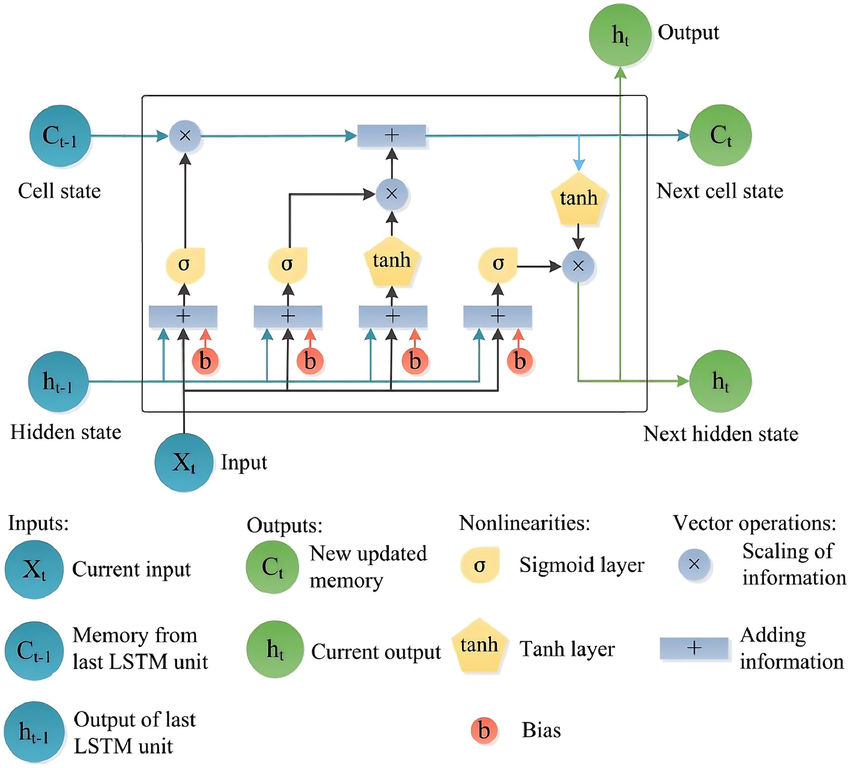

Bi-directional LSTM

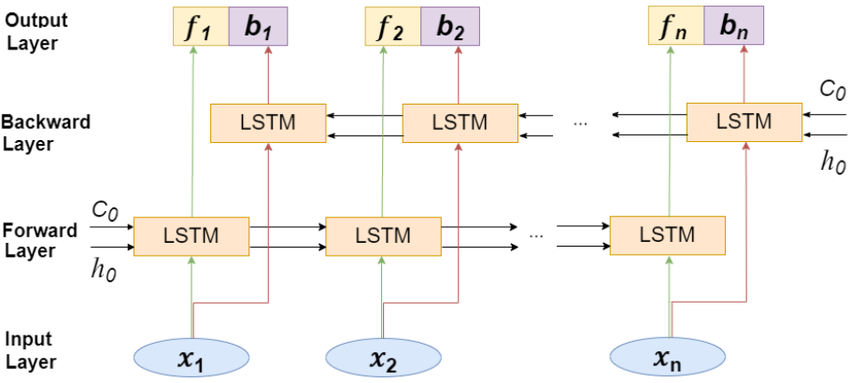

**Model Architecture**

***Embedding Layer***: converts each word token into a dense vector representation.

***Bi-directional LSTM***: uses two layers of bi-directional LSTM. Each LSTM layer processes the input sequence in both forward and backward directions. The output of an LSTM network usually consists of hidden states and optionally cell states:
- *Hidden States (Output Hidden States)* contains information that the LSTM has learned from the input sequence up to that point. It represents the LSTM's memory of the input sequence. It often used for downstream tasks such as classification, regression, or sequence generation. The shape depends on the length of the input sequence and the dimensionality of the hidden state.
- *Cell States (Output Cell States)* represents the long-term memory of the LSTM network and contains information about the long-term dependencies in the input sequence that the network has learned to capture and retain. While the cell state is not always directly used as an output, it plays a crucial role in determining the hidden states and, consequently, the behavior of the model.

***Contextualized Word Representation***: For each token, concatenate the hidden states from the forward and backward LSTM passes to form a contextualized word representation. The output from the bi-directional LSTM provides context-aware embeddings for each token in the sentence.

In [14]:
char_vocab_size = len(char_vocab)  #character vocabulary size
char_embed_dim = 50 #character embedding dimension
out_channels = 100 #number of kernel
kernel_sizes = [1, 2, 3] #kernel sizes

word_dataset, char_dataset, forward_target, backward_target = next(iter(train_loader))

batch_size, seq_len, word_len = char_dataset.size()
char_embeds = CharCNN(char_vocab_size, char_embed_dim, out_channels, kernel_sizes)(char_dataset)
char_embeds = char_embeds.view(batch_size, seq_len, -1)  # Reshape back to (batch_size, seq_len, embedding_dim)
print(f'char_dataset: {char_dataset.shape} => char_embeds: {char_embeds.shape}')


# Concatenate char_embeds and expanded word_inputs
word_embeds = torch.cat((char_embeds, word_dataset.unsqueeze(2)), dim=2)
print('word_embeds: ', word_embeds.shape)

input_size = word_embeds.shape[2]
hidden_size = 512
num_layers = 2
lstm = nn.LSTM(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
print('Bi-directional LSTM: ', lstm)
#Contextualized Word Representation
lstm_hidden_states, lstm_cell_states = lstm(word_embeds)
print('Contextualized Word Representation (both forward and backward directions): ', lstm_hidden_states.shape)
print('Contextualized Word Representation (only forward direction): ', lstm_hidden_states[:, :, :hidden_size].shape)
print('Contextualized Word Representation (only backward direction): ', lstm_hidden_states[:, :, hidden_size:].shape)

fc_forward = nn.Linear(hidden_size, char_vocab_size)
fc_backward = nn.Linear(hidden_size, char_vocab_size)
forward_lstm_out = lstm_hidden_states[:, :, :hidden_size]
backward_lstm_out = lstm_hidden_states[:, :, hidden_size:]
forward_logits = fc_forward(forward_lstm_out)
backward_logits = fc_backward(backward_lstm_out)
print('Contextualized Word Representation (only forward direction): ', forward_logits.shape)
print('Contextualized Word Representation (only backward direction): ', backward_logits.shape)

char_dataset: torch.Size([1, 117, 14]) => char_embeds: torch.Size([1, 117, 300])
word_embeds:  torch.Size([1, 117, 301])
Bi-directional LSTM:  LSTM(301, 512, num_layers=2, batch_first=True, bidirectional=True)
Contextualized Word Representation (both forward and backward directions):  torch.Size([1, 117, 1024])
Contextualized Word Representation (only forward direction):  torch.Size([1, 117, 512])
Contextualized Word Representation (only backward direction):  torch.Size([1, 117, 512])
Contextualized Word Representation (only forward direction):  torch.Size([1, 117, 30])
Contextualized Word Representation (only backward direction):  torch.Size([1, 117, 30])


In [15]:
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            bidirectional=True, batch_first=True)
    def forward(self, x):
        outputs, _ = self.lstm(x)
        return outputs

class ELMo(nn.Module):
    def __init__(self, char_vocab_size, word_vocab_size, char_embed_dim, cnn_out_channels,
                 cnn_kernel_sizes, lstm_hidden_size, lstm_num_layers):
        super(ELMo, self).__init__()
        self.lstm_hidden_size = lstm_hidden_size
        self.lstm_num_layers = lstm_num_layers
        self.char_cnn = CharCNN(char_vocab_size, char_embed_dim, cnn_out_channels, cnn_kernel_sizes)
        self.fc_forward = nn.Linear(lstm_hidden_size, word_vocab_size)
        self.fc_backward = nn.Linear(lstm_hidden_size, word_vocab_size)
    def forward(self, char_inputs, word_inputs):
        batch_size, seq_len, word_len = char_inputs.size()
        char_embeds = self.char_cnn(char_inputs)
        char_embeds = char_embeds.view(batch_size, seq_len, -1)  # Reshape back to (batch_size, seq_len, embedding_dim)
        word_embeds = torch.cat((char_embeds, word_inputs.unsqueeze(2)), dim=2)

        lstm_input_size = word_embeds.shape[2]
        lstm = BiLSTM(lstm_input_size, self.lstm_hidden_size, self.lstm_num_layers)
        lstm_outputs = lstm(word_embeds)

        forward_lstm_out = lstm_outputs[:, :, :self.lstm_hidden_size]
        backward_lstm_out = lstm_outputs[:, :, self.lstm_hidden_size:]
        forward_logits = self.fc_forward(forward_lstm_out)
        backward_logits = self.fc_backward(backward_lstm_out)

        return forward_logits, backward_logits

In [16]:
char_vocab_size = len(char_vocab)  #character vocabulary size
char_embed_dim = 50 #character embedding dimension
out_channels = 100 #number of kernel
kernel_sizes = [1, 2, 3] #kernel sizes
hidden_size = 512
num_layers = 2
word_vocab_size = len(word_vocab)

word_dataset, char_dataset, forward_target, backward_target = next(iter(train_loader))
model = ELMo(char_vocab_size, word_vocab_size, char_embed_dim, out_channels, kernel_sizes, hidden_size, num_layers)
forward_logits, backward_logits = model(char_dataset, word_dataset)
print(f'forward_logits: {forward_logits.shape}, backward_logits: {backward_logits.shape}')

forward_logits: torch.Size([1, 117, 597]), backward_logits: torch.Size([1, 117, 597])


**Training the Model**

ELMo is trained with a language modeling objective on the large text corpus for multiple epochs until the model converges, <Br>
which:
- predicts the next word in a sequence given the previous words (forward direction)
- predicts the previous word given the next words (backward direction).
<Br>

Softmax layer to predict the probabilities of words in the vocabulary. <Br>
Loss Function: cross-entropy loss. <Br>
Backpropagation through time (BPTT) to update the model parameters.

In [17]:
char_vocab_size = len(char_vocab)  #character vocabulary size
char_embed_dim = 50 #character embedding dimension
cnn_out_channels = 100 #number of kernel
cnn_kernel_sizes = [1, 2, 3] #kernel sizes
lstm_hidden_size = 512
lstm_num_layers = 2
word_vocab_size = len(word_vocab)

#Load model
model = ELMo(char_vocab_size, word_vocab_size, char_embed_dim, cnn_out_channels, cnn_kernel_sizes, lstm_hidden_size, lstm_num_layers)
model

ELMo(
  (char_cnn): CharCNN(
    (char_embed): Embedding(30, 50)
    (convs): ModuleList(
      (0): Conv2d(1, 100, kernel_size=(1, 50), stride=(1, 1))
      (1): Conv2d(1, 100, kernel_size=(2, 50), stride=(1, 1))
      (2): Conv2d(1, 100, kernel_size=(3, 50), stride=(1, 1))
    )
    (highway): HighwayNetwork(
      (linear): ModuleList(
        (0-1): 2 x Linear(in_features=300, out_features=300, bias=True)
      )
      (gate): ModuleList(
        (0-1): 2 x Linear(in_features=300, out_features=300, bias=True)
      )
    )
  )
  (fc_forward): Linear(in_features=512, out_features=597, bias=True)
  (fc_backward): Linear(in_features=512, out_features=597, bias=True)
)

In [18]:
#Create DataLoader
from torch.utils.data import DataLoader
batch_size = 3
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#Setup parameters
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

#Training
losses = []
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for batch in train_loader:
    word_inputs, char_inputs, forward_targets, backward_targets = batch
    optimizer.zero_grad()
    # Forward pass
    forward_output, backward_output = model(char_inputs, word_inputs)
    # Compute losses
    forward_loss = criterion(forward_output.reshape(-1, forward_output.size(-1)), forward_targets.view(-1))
    backward_loss = criterion(backward_output.reshape(-1, backward_output.size(-1)), backward_targets.view(-1))
    loss = forward_loss + backward_loss
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    # Accumulate loss
    epoch_loss += loss.item()

  # Compute the average loss for this epoch
  avg_epoch_loss = epoch_loss / len(train_loader)
  losses.append(avg_epoch_loss)
  print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")
print("Training complete.")

Epoch [1/5], Loss: 12.7409
Epoch [2/5], Loss: 12.6652
Epoch [3/5], Loss: 12.6009
Epoch [4/5], Loss: 12.5251
Epoch [5/5], Loss: 12.4678
Training complete.


plotting losses: 


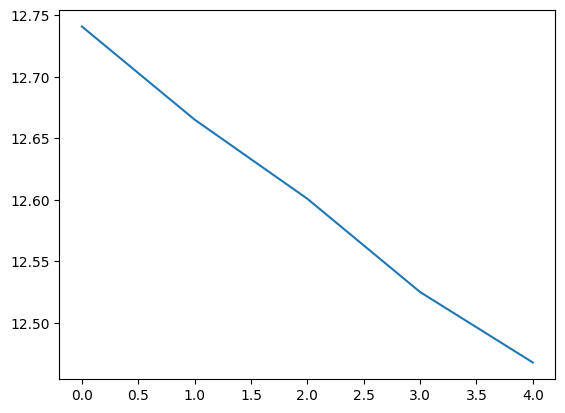

In [19]:
#plotting losses
import matplotlib.pyplot as plt
print('plotting losses: ')
li = list(zip(range(len(losses)), losses))
plt.plot(*zip(*li))

Using the the trained bi-directional LSTM to obtain contextualized word embeddings for any input text. The embeddings for each word are obtained by concatenating the hidden states from both the forward and backward LSTMs.

In [20]:
new_texts = ["This is a new sentence.", "Here is another one."]
print(f'word_vocab: {word_vocab} \nchar_vocab: {char_vocab} \nmax_word_length: {max_word_length} \nmax_seq_length: {max_seq_length}')
word_indices, char_indices = text_to_indices(new_texts, word_vocab, char_vocab, max_word_length)
print('word_indices: ', word_indices)
print('char_indices: ', char_indices)

def preprocess_text(chars, words, seq_length):
  w = []
  c = []
  for chars, words in zip(char_indices, word_indices):
    if len(chars) < seq_length:
        words += [0] * (seq_length - len(words))
        chars += [[0] * len(chars[0])] * (seq_length - len(chars))
    else:
        words = words[:seq_length]
        chars = chars[:seq_length]
    w.append(words)
    c.append(chars)
  return torch.tensor(w), torch.tensor(c)

word_dataset, char_dataset = preprocess_text(char_indices, word_indices, max_seq_length)
print(f'word_dataset: {word_dataset.shape}, char_dataset: {char_dataset.shape}')

word_vocab: {'illustration': 1, 'alice': 2, 's': 3, 'adventures': 4, 'in': 5, 'wonderland': 6, 'by': 7, 'lewis': 8, 'carroll': 9, 'the': 10, 'millennium': 11, 'fulcrum': 12, 'edition': 13, '3': 14, '0': 15, 'contents': 16, 'chapter': 17, 'i': 18, 'down': 19, 'rabbit': 20, 'hole': 21, 'ii': 22, 'pool': 23, 'of': 24, 'tears': 25, 'iii': 26, 'a': 27, 'caucus': 28, 'race': 29, 'and': 30, 'long': 31, 'tale': 32, 'iv': 33, 'sends': 34, 'little': 35, 'bill': 36, 'v': 37, 'advice': 38, 'from': 39, 'caterpillar': 40, 'vi': 41, 'pig': 42, 'pepper': 43, 'vii': 44, 'mad': 45, 'tea': 46, 'party': 47, 'viii': 48, 'queen': 49, 'croquet': 50, 'ground': 51, 'ix': 52, 'mock': 53, 'turtle': 54, 'story': 55, 'x': 56, 'lobster': 57, 'quadrille': 58, 'xi': 59, 'who': 60, 'stole': 61, 'tarts': 62, 'xii': 63, 'evidence': 64, 'was': 65, 'beginning': 66, 'to': 67, 'get': 68, 'very': 69, 'tired': 70, 'sitting': 71, 'her': 72, 'sister': 73, 'on': 74, 'bank': 75, 'having': 76, 'nothing': 77, 'do': 78, 'once': 79, 

In [21]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No need to track gradients for inference
    forward_logits, backward_logits = model(char_dataset, word_dataset)

# You can use the forward or backward LSTM outputs as embeddings
# For simplicity, let's just use the forward LSTM outputs
forward_embeddings = forward_logits
backward_embeddings = backward_logits
print("Forward embeddings shape:", forward_embeddings.shape)
print("Backward embeddings shape:", backward_embeddings.shape)

Forward embeddings shape: torch.Size([2, 117, 597])
Backward embeddings shape: torch.Size([2, 117, 597])


In [22]:
# Example of extracting embeddings for the first sentence
sentence_index = 0
forward_sentence_embeddings = forward_embeddings[sentence_index]
backward_sentence_embeddings = backward_embeddings[sentence_index]
print("Forward sentence embeddings shape:", forward_sentence_embeddings.shape)
print("Backward sentence embeddings shape:", backward_sentence_embeddings.shape)

# You can choose to use the forward, backward, or a combination of both embeddings
# For instance, concatenating forward and backward embeddings
combined_embeddings = torch.cat((forward_sentence_embeddings, backward_sentence_embeddings), dim=1)
print("Combined embeddings shape:", combined_embeddings.shape)

Forward sentence embeddings shape: torch.Size([117, 597])
Backward sentence embeddings shape: torch.Size([117, 597])
Combined embeddings shape: torch.Size([117, 1194])
